In [ ]:
#Read the data
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' , sep=';')
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.isnull().sum() # check for null

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#preprocessing 
data.isnull().sum() # check for null
data.drop_duplicates(subset=None,inplace=True) # drop duplicates (1599,12) ---> (1359, 12)
data.shape # dimensions of the dataset

(1359, 12)

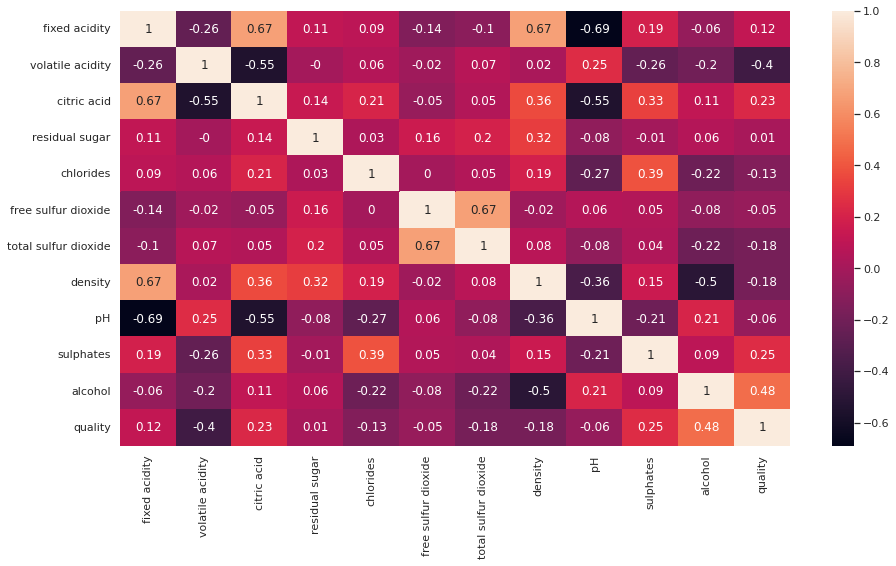

In [ ]:
# Getting the corelation between attributes
import seaborn as sns
correlation_matrix = data.corr().round(2)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
X = data.drop("quality", axis = 1) # quality is our output label
#Based on the heat map and correlation matrix, dropping residual sugar, pH and free sulphur dioxide as it has low values
X = X.drop("free sulfur dioxide", axis = 1)
X = X.drop("pH", axis = 1)
X = X.drop("residual sugar", axis = 1)
Y = data['quality']



In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

#one hot encoding of label - 'quality' 
label_encoder = LabelEncoder()
label_encoder.fit(Y)
y_encoded = label_encoder.transform(Y)
y_encoded = to_categorical(y_encoded)

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling the data to fit the model
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
#split the data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.20)

In [ ]:
X_train.shape


(1087, 8)

In [ ]:
y_train.shape # identifies 6 classes

(1087, 6)

In [ ]:
df = pd.DataFrame(res)
df.columns =['Activation functions', 'Learning Rate', 'Epoch', 'Hidden Layers','MSE-Train Data' , 'MSE-Test Data' , 'R2-Train Data', 'R2-Test Data','Train Accuracy', 'Test Accuracy']

df.to_excel(excel_writer = "neuralnetHistory.xlsx")

In [ ]:
import tensorflow as tf
import keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

results = []
activations = ["sigmoid", "relu", "tanh"]
#activations = ["relu"]
learning_rate = [0.01, 0.1]
#learning_rate = [0.01]
epochs = [100, 200]
#epochs = [10]
num_hidden_layers = [2,3]

for i in activations:
  for j in learning_rate:
    for k in epochs:
      for l in num_hidden_layers:
        result = []
        inputLayer = Input(shape=(8,))
        x = layers.Dense(16, activation=i)(inputLayer)
        if l == 2:
            x = layers.Dense(32, activation=i)(x)
            x = layers.Dense(16, activation=i)(x)
        if l == 3:
            x = layers.Dense(32, activation=i)(x)
            x = layers.Dense(16, activation=i)(x)
            x = layers.Dense(8, activation=i)(x)

        outputLayer = layers.Dense(6, activation=i)(x)

        nn_model = Model(inputs = inputLayer, outputs = outputLayer)
        optimizer = optimizers.Adam(learning_rate=j)
        nn_model.compile(optimizer=optimizer, metrics = ["accuracy"], loss = "mean_squared_error")

        history = nn_model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 10, epochs = k)
        trainPrediction = nn_model.predict((X_train))
        testPrediction = nn_model.predict(np.array(X_test))
        MSE_train = mean_squared_error(y_train,trainPrediction)
        MSE_test = mean_squared_error(y_test,testPrediction)
        R2_train = r2_score(y_train,trainPrediction)
        R2_test = r2_score(y_test,testPrediction)
        
        accuracy.append(history.history['accuracy'])
        accuracy.append(history.history['val_accuracy'])
        result.append(i)
        result.append(j)
        result.append(k)
        result.append(l)
        result.append(MSE_train)
        result.append(MSE_test)
        result.append(R2_train)
        result.append(R2_test)
        result.append(history.history['accuracy'][-1])
        result.append(history.history['val_accuracy'][-1])
        results.append(result)

Streaming output truncated to the last 5000 lines.
109/109 [==============================] - 0s 3ms/step - loss: 0.1094 - accuracy: 0.4149 - val_loss: 0.1112 - val_accuracy: 0.3787
Epoch 102/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.4195 - val_loss: 0.1101 - val_accuracy: 0.4375
Epoch 103/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.4195 - val_loss: 0.1123 - val_accuracy: 0.3787
Epoch 104/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.4305 - val_loss: 0.1114 - val_accuracy: 0.3787
Epoch 105/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.3928 - val_loss: 0.1114 - val_accuracy: 0.3787
Epoch 106/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.3974 - val_loss: 0.1090 - val_accuracy: 0.4375
Epoch 107/200
109/109 [==============================] - 0s 3ms/step - loss: 0.1103 - accurac

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(results)
df.columns =['ActivationFunction', 'LearningRate', 'Epoch', 'HiddenLayers','MSE-TrainData' , 'MSE-TestData' , 'R2-Train Data', 'R2-Test Data','TrainAccuracy', 'TestAccuracy']
df.to_excel(excel_writer = "resultss.xlsx")


Text(0.5, 0, 'epoch')

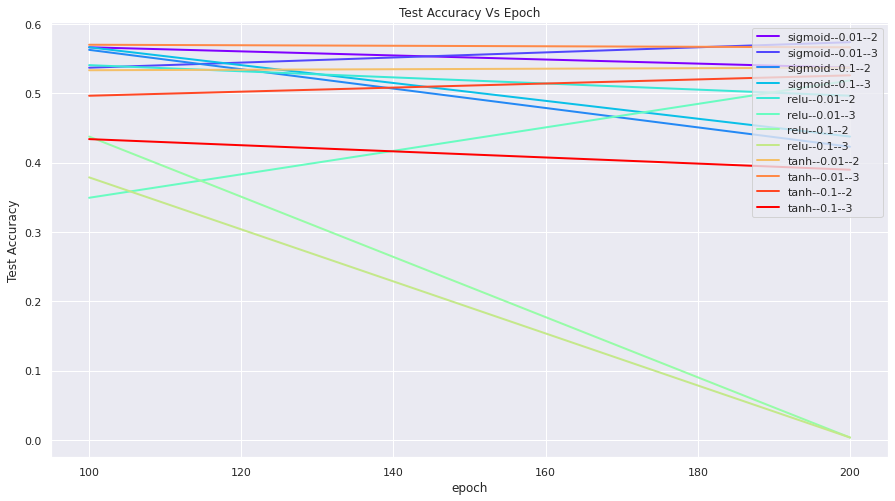

In [ ]:
#Plot between Testing dataset accuracy and epoch
from matplotlib.pyplot import cm
activations = ["sigmoid", "relu", "tanh"]
learning_rate = [0.01, 0.1]
epochs = [100, 200]
num_hidden_layers = [2,3]

n = 100
color = iter(cm.rainbow(np.linspace(0, 1, 12)))

for i in activations:
  for j in learning_rate:
      for l in num_hidden_layers:
        plt.plot( 'Epoch', 'TestAccuracy', data=df.loc[(df['ActivationFunction']==i)&(df['LearningRate']==j)&(df['HiddenLayers']==l)], markersize=12, color= next(color), linewidth=2,label=i+"--"+str(j)+"--"+str(l))    
        plt.legend(loc='upper right')

plt.title('Test Accuracy Vs Epoch')
plt.ylabel('Test Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

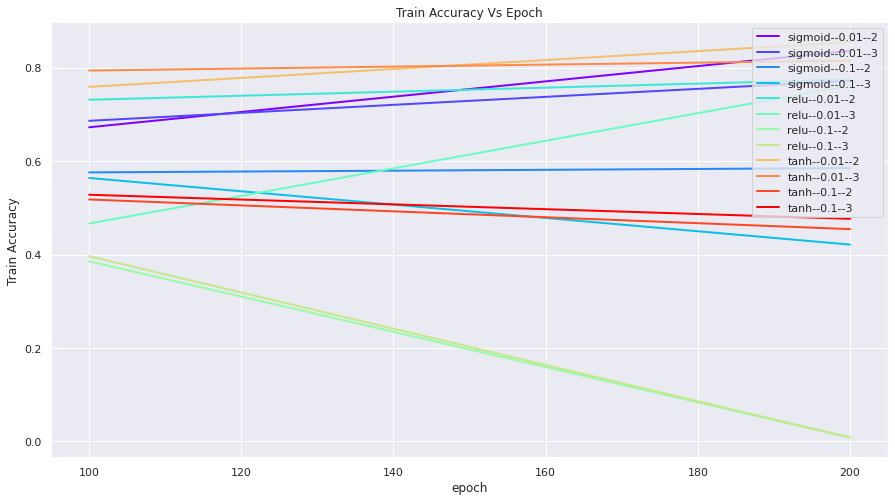

In [ ]:
#Plot between Training dataset accuracy and epoch

from matplotlib.pyplot import cm
activations = ["sigmoid", "relu", "tanh"]
learning_rate = [0.01, 0.1]
epochs = [100, 200]
num_hidden_layers = [2,3]

n = 100
color = iter(cm.rainbow(np.linspace(0, 1, 12)))

for i in activations:
  for j in learning_rate:
      for l in num_hidden_layers:
        plt.plot( 'Epoch', 'TrainAccuracy', data=df.loc[(df['ActivationFunction']==i)&(df['LearningRate']==j)&(df['HiddenLayers']==l)], markersize=12, color= next(color), linewidth=2,label=i+"--"+str(j)+"--"+str(l))    
        plt.legend(loc='upper right')

plt.title('Train Accuracy Vs Epoch')
plt.ylabel('Train Accuracy')
plt.xlabel('epoch')

In [ ]:
import pickle

pickle.dump( accuracy, open( "accuracy.p", "wb" ) )
pickle.dump( val_accuracy, open( "val_accuracy.p", "wb" ) )


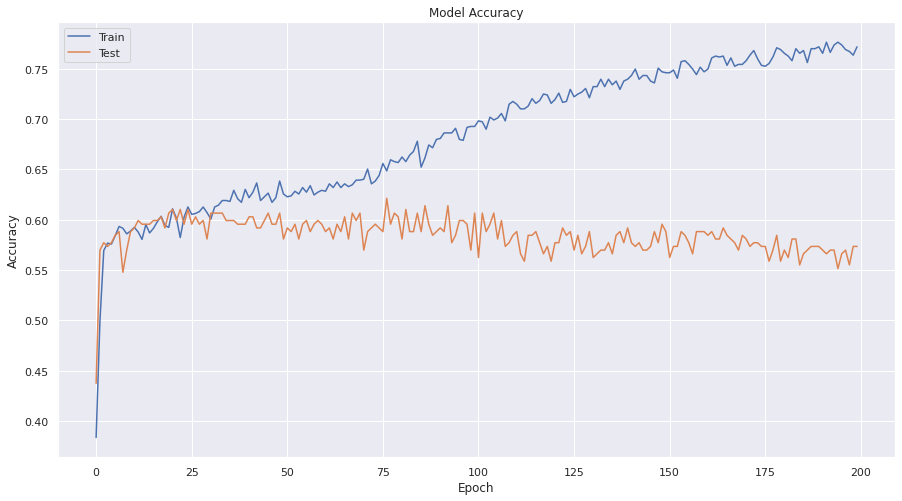

In [ ]:
#Train and Test accuracy vs Epoch for one single plot
#Note: Used only one plot because having many plots in one and analyzing accuracy is little confusing.
i = 3

plt.plot(accuracy[2*i])
plt.plot(accuracy[2*i + 1])
# plt.plot(accuracy[2])
# plt.plot(accuracy[2])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()